# Equipo: 81
# Nombres:
Juan Carlos Garcia Rendon Martinez - A01793708

Tomás Estrada Ferreira - A01201569

# Materia: Ciencia y Analitica de Datos
# Profesor: Bernardo Charles Canales
# Fecha: 09/10/2022

In [17]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
filepath  = r'C:\Users\tomas_estrada\Downloads\default of credit card clients.csv'

#Cereals = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cereals.csv'
basedf = pd.read_csv(filepath)
df = basedf.copy()
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [12]:
ndf = df.iloc[:,1:24].dropna(axis=0)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [23]:
ndf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


# Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

<AxesSubplot:>

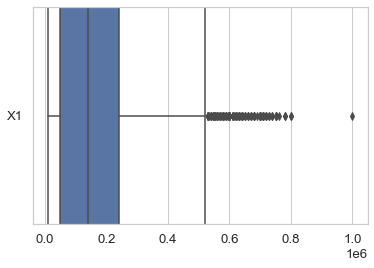

In [59]:
sns.boxplot(data=ndf[['X1']], orient="h",width = 5000)


<AxesSubplot:>

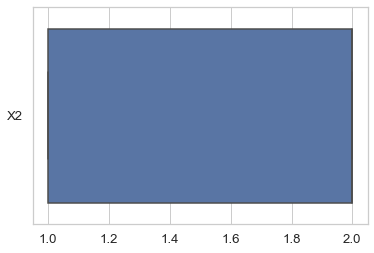

In [61]:
sns.boxplot(data=ndf[['X2']], orient="h")


<AxesSubplot:>

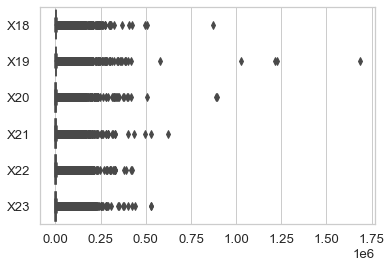

In [62]:
sns.boxplot(data=ndf[['X18','X19','X20','X21','X22','X23']], orient="h")


In [ ]:
processed_data = preprocessing.scale(ndf)

In [49]:
processed_data

array([[-1.13736269,  0.8096885 ,  0.18584882, ..., -0.30810735,
        -0.31412418, -0.29348473],
       [-0.36656147,  0.8096885 ,  0.18584882, ..., -0.24431534,
        -0.31412418, -0.18105373],
       [-0.59780183,  0.8096885 ,  0.18584882, ..., -0.24431534,
        -0.24870184, -0.01240721],
       ...,
       [-1.06028257, -1.23504286,  0.18584882, ..., -0.0401809 ,
        -0.18327949, -0.11921667],
       [-0.67488196, -1.23504286,  1.45093833, ..., -0.18524394,
         3.15090487, -0.19207196],
       [-0.90612232, -1.23504286,  0.18584882, ..., -0.24431534,
        -0.24870184, -0.23726923]])

Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.


# Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [13]:
pcs = PCA()
pcs.fit(preprocessing.scale(ndf)) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5581,2.0243,1.2454,1.2131,1.0128,0.9783,0.9528,0.9422,0.9335,0.8849,...,0.7243,0.6354,0.5097,0.4992,0.4345,0.3632,0.2649,0.2020,0.1590,0.1524
Proportion of variance,0.2845,0.1782,0.0674,0.0640,0.0446,0.0416,0.0395,0.0386,0.0379,0.0340,...,0.0228,0.0176,0.0113,0.0108,0.0082,0.0057,0.0030,0.0018,0.0011,0.0010
Cumulative proportion,0.2845,0.4627,0.5301,0.5941,0.6387,0.6803,0.7198,0.7584,0.7962,0.8303,...,0.9394,0.9570,0.9683,0.9791,0.9873,0.9931,0.9961,0.9979,0.9990,1.0000


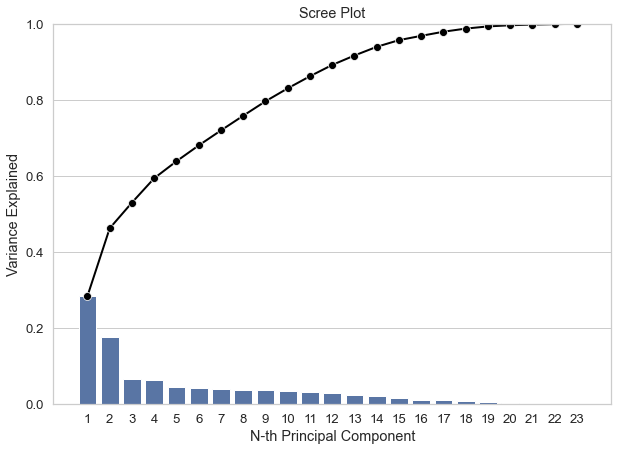

In [18]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


# Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [19]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=ndf.columns
                                )
pcsComponents_df.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.068513,0.316364,0.017300,0.069526,-0.150030,-0.375095,0.106564,-0.059519,0.021914,0.017330,0.008608,-0.097753,0.359992,-0.754050
X2,-0.021586,0.030205,0.024284,-0.078109,0.883357,-0.396295,0.065237,-0.027989,0.019138,0.023981,-0.009356,0.057416,0.176851,0.113287
X3,0.019167,-0.091513,-0.316638,0.246490,0.365704,0.563608,-0.400609,0.080516,-0.156240,0.062782,0.001826,-0.185169,0.084609,-0.372845
X4,-0.005612,-0.043043,0.453725,-0.443931,-0.053225,0.280022,-0.160569,0.026316,-0.056505,0.038759,-0.010357,-0.142041,0.666526,0.133794
X5,0.014262,0.066656,-0.463023,0.462041,-0.164345,-0.088112,0.081440,-0.012669,0.047052,0.008012,-0.021446,-0.048505,0.577125,0.432564
X6,0.161183,-0.298260,-0.017384,0.016395,-0.035463,-0.039066,-0.086692,0.021131,-0.030753,0.003439,0.044480,0.623610,0.156214,-0.097477
X7,0.194171,-0.334879,0.017808,0.050119,-0.037997,-0.060660,-0.091881,0.015266,-0.033568,0.006629,0.028042,0.376411,0.081480,-0.083438
X8,0.200348,-0.343802,0.061514,0.084101,-0.023945,-0.069601,-0.020974,-0.026630,-0.011472,-0.024926,-0.106814,0.100277,0.051691,-0.084709
X9,0.207166,-0.344508,0.088704,0.109227,-0.007883,-0.087272,0.039403,-0.056142,0.044599,-0.057006,-0.007062,-0.211043,0.018232,-0.060638
X10,0.211029,-0.331488,0.108582,0.115438,0.001892,-0.087219,0.104041,-0.033713,0.054854,0.066757,0.010431,-0.358645,-0.023265,-0.020726


In [20]:
pcsComponents_df.PC1.nlargest(5)

X15    0.353848
X16    0.351716
X14    0.349744
X13    0.345767
X17    0.344477
Name: PC1, dtype: float64

In [64]:
pcsComponents_df.PC1.idxmin()

'X2'

In [21]:
pcsComponents_df.PC2.nlargest(5)

X1     0.316364
X20    0.151574
X18    0.149151
X14    0.146301
X15    0.145535
Name: PC2, dtype: float64

In [22]:
pcsComponents_df.PC3.nlargest(5)

X4     0.453725
X19    0.301459
X18    0.281554
X20    0.279978
X21    0.237215
Name: PC3, dtype: float64




# Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

#### ¿Cuál es el número de componentes mínimo y por qué?
Se considera que existe un nivel de 90% de explicacion de varianza con 12 componentes incluidos en el modelo, sin embargo debido al incremento gradual de los componentes, se puede distinguir que con  8 componentes ya se tiene  un 80% de la variacion. Existen metodos como  el "elbow method" para destacar por medio del cambio repentino de la pendiente del acumulado de la varianza para  determinar el nodo(N-Component) en el cual se empieza a tener un beneficio marginal y el PCA pierde su finalidad.


#### ¿Cuál es la variación de los datos que representan esos componentes?
se  Puede distinguir que gran parte de  la varianza de los componentes  vienen de los atributos que oscilan del atributo 12 al 23, esto es debido a la naturaleza de los mismos. ya que son registros de estados de cuenta. por otro lado, se encuentran variable categoricas como genero o nivel de estudios, con una distribucion homogenea, finalmente, en el monto de creditos solicitados, se ve la distribucion de los montos con un sezgo a la izquierda, lo que sugiere que hay muchos outliers de creditos muy altos

#### ¿Cuál es la pérdida de información después de realizar PCA? 
al realizar PCA se pierde significancia de variables categoricas,las cuales en este caso, eran de indole de genero, nivel de estudios y  situación civil, las cuales pudieran ser transformadas en variables dummy para evitar perder su significads. 

#### De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
El X15 queda considerada como elemento principal en el PC1,  y el X2 como el menos significativo, sin embargo esto es debido al tipo
de variable(categorica)  y la perdida de significado que esta tiene, 

#### ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
El PCA se recomienda cuando se tiene un gran numero de dimensiones  y estas son variable continuas, que no estan intentando categorizar
o explicar por medio de valores fijos, tambien es recomentable cuando se necesita descartar elementos o identificar variables
potenciales. Para efectos de clustering o clasificacion, el PCA sirve como un metodo de definicion de variables, asi como en 
redes neuronales como atributos transformados 
 